In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

### Part 1: Data Exploration: Graduate School Admissions

1. Load in the dataset into pandas: data/grad.csv.

In [2]:
df = pd.read_csv('grad.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


2. Use the pandas describe method to get some preliminary summary statistics on the data. In particular look at the mean values of the features.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


3a. Use the pandas crosstab method to see how many applicants from each rank of school were accepted. You should get a dataframe that looks like this:

In [4]:
pd.crosstab(df['admit'], df['rank'])

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


3b. Make a bar plot of the percent of applicants from each rank who were accepted. You can do .plot(kind="bar") on a pandas dataframe.

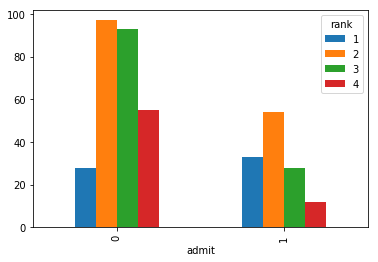

In [5]:
pd.crosstab(df['admit'], df['rank']).plot(kind="bar")

4. What does the distribution of the GPA and GRE scores look like? Do the distributions differ much?

No the distributions do not differ much (see plots below)

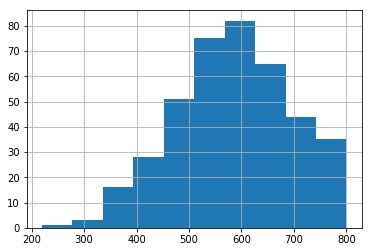

In [6]:
df.gre.hist()

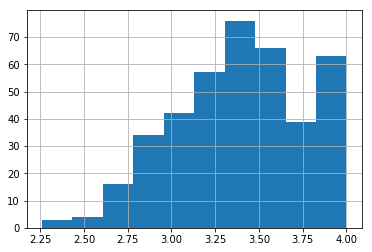

In [7]:
df.gpa.hist()

,admit,gre,gpa,rank,gre_gpa
0,0,380,3.61,3,1371.8
1,1,660,3.67,3,2422.2
2,1,800,4.00,1,3200.0
3,1,640,3.19,4,2041.6
4,0,520,2.93,4,1523.6


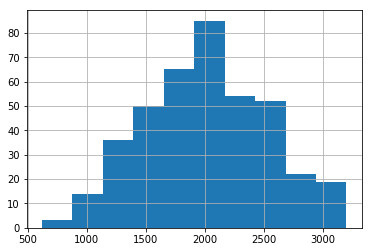

In [8]:
df['gre_gpa'] = df.gre * df.gpa
df.gre_gpa.hist()
df.head()

In [9]:
# makes the accuracy and precision go down
df[['rnk_1', 'rnk_2', 'rnk_3', 'rnk_4']] = pd.get_dummies(df['rank'])
df = df.drop(columns = ['rank', 'rnk_1'])
df.head()

,admit,gre,gpa,gre_gpa,rnk_2,rnk_3,rnk_4
0,0,380,3.61,1371.8,0,1,0
1,1,660,3.67,2422.2,0,1,0
2,1,800,4.00,3200.0,0,0,0
3,1,640,3.19,2041.6,0,0,1
4,0,520,2.93,1523.6,0,0,1


5. Make a scatterplot of each predictor variable vs. the target (admitted). This can be tricky, because the target in a classification model can only take on two possible values. You may wish to add some random noise to the y-coordinates (also called "jitter") to make the data density easier to see.

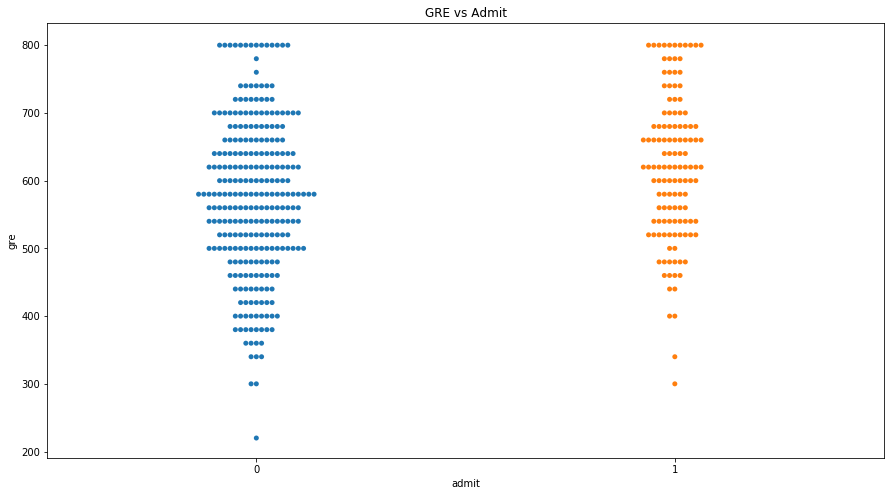

In [10]:
plt.figure(figsize = (15,8))
sn.swarmplot(df.admit, df.gre)

plt.title('GRE vs Admit')
plt.show()

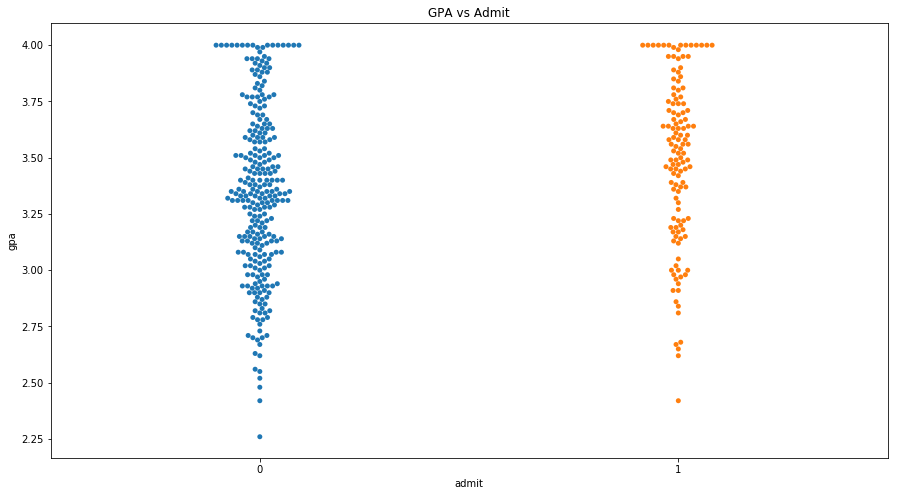

In [11]:
plt.figure(figsize = (15,8))
sn.swarmplot(df.admit, df.gpa)

plt.title('GPA vs Admit')
plt.show()

In [12]:
# plt.figure(figsize = (15,8))
# sn.swarmplot(df.admit, df['rank'])

# plt.title('Rank vs Admit')
# plt.show()

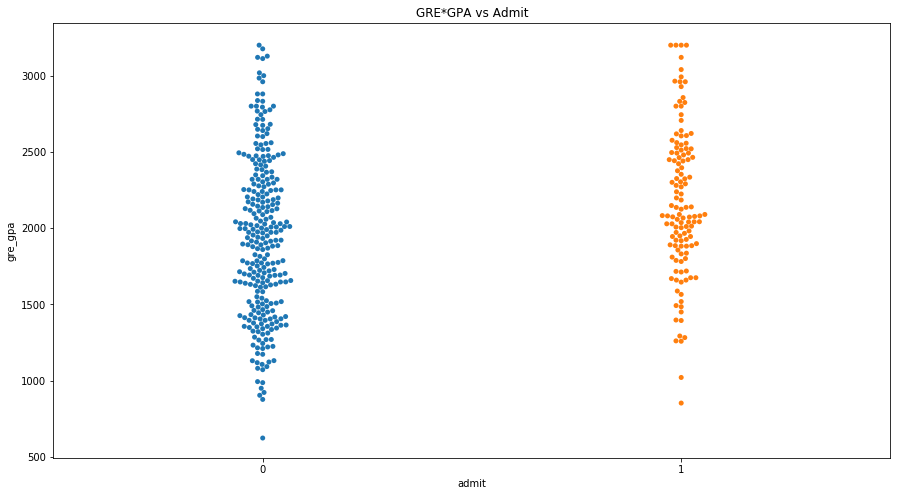

In [13]:
plt.figure(figsize = (15,8))
sn.swarmplot(df.admit, df.gre_gpa)

plt.title('GRE*GPA vs Admit')
plt.show()

### Part 2: Predicting Graduate School Admissions

1. Use sklearn to fit a Logistic Regression to the raw data. Your target variable should be admittance to graduate school.

In [14]:
y = df.pop('admit')
X = df

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [16]:
base = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

2. Once we feel comfortable with our model, we can move on to cross validation. Use sklearn's KFold cross validation and LogisticRegression to calculate the average log-loss across a 10 fold cross validation. Try to gridsearch across various hyperparameters to increase the predictive power of your model.

In [17]:
logistic = linear_model.LogisticRegression()
params = {'C' : np.logspace(-4, 4)}
gs = GridSearchCV(logistic, param_grid=params, cv=10).fit(X_train, y_train)
gs

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-04, 1.45635e-04, 2.12095e-04, 3.08884e-04, 4.49843e-04,
       6.55129e-04, 9.54095e-04, 1.38950e-03, 2.02359e-03, 2.94705e-03,
       4.29193e-03, 6.25055e-03, 9.10298e-03, 1.32571e-02, 1.93070e-02,
       2.81177e-02, 4.09492e-02, 5.96362e-02, 8.68511e-02, 1.26486e... 1.04811e+03, 1.52642e+03,
       2.22300e+03, 3.23746e+03, 4.71487e+03, 6.86649e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
def model_stats(model, X_test, y_test):
    y_hat = model.predict(X_test)
    p_hat = model.predict_proba(X_test)[:,1]
    log_lo = log_loss(y_test, p_hat)
    acc = accuracy_score(y_test, y_hat)
    prec = precision_score(y_test, y_hat)
    cm = confusion_matrix(y_test, y_hat)
    cmdf = pd.DataFrame(cm, index=['Predict No','Predict Yes'], columns=['Actual No', 'Actual Yes'])
    return(log_lo, acc, prec, cmdf)

In [19]:
## get model stats for gridsearch
gs_log_lo, gs_acc, gs_prec, gs_cmdf = model_stats(gs, X_test, y_test)

In [20]:
('Grid Search Model -- log loss: {:.2f}; accuracy: {:.2f}; precision: {:.2f}'.format(gs_log_lo, gs_acc, gs_prec))

'Grid Search Model -- log loss: 0.58; accuracy: 0.70; precision: 0.67'